# Opening

Boothcamp JAP Rakamin, About Me: 
* Name             	: Mohamad Reza Syahziar
* Major          	: Data Science
* JAP Batch   	    : 5
* Hiring Status	    : Actively looking for jobs
* Education	        : Computational Science
* Institution	    : Telkom University
* Tools Mastery     : Python for data science, SQL, Google BigQuery, Google Data Studio, Ms.Excel

# Background

Pada projek ini kita akan melakukan pemodelan machine learning, untuk memprediksi apakah customer good atau bad dalam peminjaman kredit untuk meningkatkan pemilihan kustomer untuk peminjaman kredit. Kata dapat berasusmsi bahwa diri kita sebagai Data Scientist pada perusahaan di bidang consultant digital marketing.

# Problem

Tim bisnis ingin mengoptimalkan metode cara menentukan customer yang dapat diberikan pinjaman kredit. Agar cost dan resiko yang akan dikeluarkan tidak terlalu besar.

# Goals

Membuat machine learning model yang dapat mendeteksi potential customer yang dapat diberikan pinjaman kredit. Sehingga kita bisa mengoptimalkan cost dan mengurangi resiko tidak dikembalikannya pinjaman.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from datetime import datetime as dt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from collections import defaultdict
import ppscore as pps

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
## UDF for experimenting several classification models
def experiment(X_train,X_test,y_train,y_test):
    """
    This function want to do an experiment for several models.
    We just need data input

    Parameter
    ---------
    X_train = training data contains several features
    X_test = testing data contains several features
    y_train = train target
    y_test = test target
    """
    result = defaultdict(list)
    
    knn = KNeighborsClassifier()
    logreg = LogisticRegression()
    dtc = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    grad = GradientBoostingClassifier()
    
    list_model = [('K-Nearest Neighbor',knn),
                  ('Logistic Regression',logreg),
                  ('Decision Tree',dtc),
                  ('Random Forest',rf),
                  ('Gradient Boosting',grad)
                 ]
    
    for model_name,model in list_model:
        start = dt.now()
        model.fit(X_train,y_train)
        duration = (dt.now()-start).total_seconds()
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        
        result['model_name'].append(model_name)
        result['model'].append(model)
        result['accuracy'].append(accuracy)
        result['recall'].append(recall)
        result['precision'].append(precision)
        result['duration'].append(duration)
        
    return result

# Data 

In [3]:
df = pd.read_csv('E:\Rakamin\JAP\Virtual Internship Program\IDX Partners Data Scientist (VIP)\Week 4\Final Task\dataset\loan_data_2007_2014.csv')
df.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
204643,204643,1425554,1676695,20000,20000,20000.0,36 months,12.12,665.44,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72037,72037,8375660,10117755,2000,2000,2000.0,36 months,15.61,69.93,C,...,NaN,NaN,NaN,NaN,NaN,NaN,3100.0,NaN,NaN,NaN
102460,102460,6205292,7687425,8000,8000,8000.0,36 months,15.22,278.19,C,...,NaN,NaN,NaN,NaN,NaN,NaN,37075.0,NaN,NaN,NaN
198536,198536,1527162,1791351,35000,35000,35000.0,60 months,23.83,1003.43,F,...,NaN,NaN,NaN,NaN,NaN,NaN,43100.0,NaN,NaN,NaN
190350,190350,1635087,1907265,16500,16500,16500.0,36 months,14.33,566.58,C,...,NaN,NaN,NaN,NaN,NaN,NaN,34900.0,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


In [6]:
df.select_dtypes('object').describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


Dari analisis info dan statistik deskriptif diatas maka akan didrop kolom-kolom dengan :
1. kolom dengan nilai unik yang terlalu banyak atau terlalu sedikit
2. kolom yang hanya memiliki nilai Null
3. kolom dengan data yang nilainya aneh seperti nilai kuartilnya bernilai 0, <br> setelah analisis kolom total_rec_late_fee, recoveries, dan collection_recovery_fee dimana kolom-kolom ini berhubungan dengan pemulihan jadi nilai yang diberikan wajar jika aneh, maka kolom selain kolom tersebut yang bernilai aneh akan didrop kolomnya

In [7]:
df_clg = df.copy()

In [8]:
df_clg = df_clg.drop(['Unnamed: 0', 'id','term','sub_grade','emp_title','emp_length','verification_status','pymnt_plan','url','desc','title','zip_code','addr_state','delinq_2yrs','inq_last_6mths','pub_rec','initial_list_status','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','application_type','annual_inc_joint','dti_joint', 'verification_status_joint','acc_now_delinq','tot_coll_amt','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m'],axis=1)
df_clg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   member_id                466285 non-null  int64  
 1   loan_amnt                466285 non-null  int64  
 2   funded_amnt              466285 non-null  int64  
 3   funded_amnt_inv          466285 non-null  float64
 4   int_rate                 466285 non-null  float64
 5   installment              466285 non-null  float64
 6   grade                    466285 non-null  object 
 7   home_ownership           466285 non-null  object 
 8   annual_inc               466281 non-null  float64
 9   issue_d                  466285 non-null  object 
 10  loan_status              466285 non-null  object 
 11  purpose                  466285 non-null  object 
 12  dti                      466285 non-null  float64
 13  earliest_cr_line         466256 non-null  object 
 14  mths

In [9]:
# periksa apakah terdapat kolom dengan nilai null
df_clg.isnull().sum()

member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
int_rate                        0
installment                     0
grade                           0
home_ownership                  0
annual_inc                      4
issue_d                         0
loan_status                     0
purpose                         0
dti                             0
earliest_cr_line               29
mths_since_last_delinq     250351
mths_since_last_record     403647
open_acc                       29
revol_bal                       0
revol_util                    340
total_acc                      29
out_prncp                       0
out_prncp_inv                   0
total_pymnt                     0
total_pymnt_inv                 0
total_rec_prncp                 0
total_rec_int                   0
total_rec_late_fee              0
recoveries                      0
collection_recovery_fee         0
last_pymnt_d  

### Handling missing kolom

Terdapat nilai null pada kolom berikut:
* annual_inc (drop baris)
* earliest_cr_line (drop baris)
* mths_since_last_delinq (drop kolom)
* mths_since_last_record (drop kolom)
* open_acc (drop baris)
* total_acc (drop baris)
* next_pymnt_d (drop kolom)
* last_credit_pull_d (drop baris)
* tot_cur_bal (drop kolom)
* total_rev_hi_lim (drop kolom) 

<br>
Handling null data pada projek ini yaitu kolom dengan nilai null yang terlalu banyak akan didrop kolomnya dan jika nilai null sedikit maka akan didrop barisnya, selain itu akan di analisis apakah akan di drop atau di fillna barisnya, dan dari analisis yang dilakukan bahwa kolom :
<br>

* revol_util (lebih baik didrop baris, karena jika di fillna dimungkinkan dapat mempengaruhi hasil prediksi) 
* last_pymnt_d (lebih baik didrop baris, karena jika difilna kemungkinan akan tidak tepat dan mempengaruhi hasil prediksi)

In [10]:
# kolom yang akan didrop 
df_clg = df_clg.drop(['mths_since_last_delinq', 'mths_since_last_record','next_pymnt_d', 'tot_cur_bal','total_rev_hi_lim'],axis=1)

# baris yang akan didrop 
df_clg = df_clg.dropna(subset=['annual_inc','earliest_cr_line','open_acc','total_acc','last_credit_pull_d','revol_util','last_pymnt_d'])

df_clg.isnull().sum()

member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
int_rate                   0
installment                0
grade                      0
home_ownership             0
annual_inc                 0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
earliest_cr_line           0
open_acc                   0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_d               0
last_pymnt_amnt            0
last_credit_pull_d         0
dtype: int64

In [11]:
df_ing = df_clg.copy()
df_ing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465534 entries, 0 to 466284
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   member_id                465534 non-null  int64  
 1   loan_amnt                465534 non-null  int64  
 2   funded_amnt              465534 non-null  int64  
 3   funded_amnt_inv          465534 non-null  float64
 4   int_rate                 465534 non-null  float64
 5   installment              465534 non-null  float64
 6   grade                    465534 non-null  object 
 7   home_ownership           465534 non-null  object 
 8   annual_inc               465534 non-null  float64
 9   issue_d                  465534 non-null  object 
 10  loan_status              465534 non-null  object 
 11  purpose                  465534 non-null  object 
 12  dti                      465534 non-null  float64
 13  earliest_cr_line         465534 non-null  object 
 14  open

Data Dictionary untuk kolom yang terpilih:
<br>

0. member_id : id member
1. loan_amnt : Last month payment was received
2. funded_amnt : The total amount committed to that loan at that point in time.
3. funded_amnt_inv : The total amount committed to that loan at that point in time funded by investors.
4. int_rate : Interest Rate on the loan
5. installment : The monthly payment owed by the borrower if the loan originates.
6. grade : LC assigned lo an grade
7. home_ownership : The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
8. annual_inc : The self-reported annual income provided by the borrower during registration.
9. issue_d : The month which the loan was funded
10. loan_status : Current status of the loan
11. purpose : A category provided by the borrower for the loan request. 
12. dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
13. earliest_cr_line : The month the borrower's earliest reported credit line was opened
14. open_acc : Number of open trades
15. revol_bal : Total credit revolving balance
16. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.        
17. total_acc : The total number of credit lines currently in the borrower's credit file
18. out_prncp : Remaining outstanding principal for total amount funded
19. out_prncp_inv : Remaining outstanding principal for portion of total amount funded by investors
20. total_pymnt : Payments received to date for total amount funded
21. total_pymnt_inv : Payments received to date for portion of total amount funded by investors
22. total_rec_prncp : Principal received to date
23. total_rec_int : Interest received to date
24. total_rec_late_fee : Late fees received to date
25. recoveries : post charge off gross recovery
26. collection_recovery_fee : post charge off collection fee
27. last_pymnt_d : Last month payment was received
28. last_pymnt_amnt : Last total payment amount received
29. last_credit_pull_d : The most recent month LC pulled credit for this loan

# Feature Engineering

In [12]:
# Extract Date 
df_dt = df_ing.copy()

# Extract Date issue_d
df_dt['month_issue_d'] = df_dt['issue_d'].astype(str).str.partition("-")[0]
df_dt['year_issue_d'] = df_dt['issue_d'].astype(str).str.partition("-")[2] 

# ubah ke angka agar dapat diproses 
df_dt['month_issue_da'] = np.select([(df_dt['month_issue_d'] == 'Jan'),
                              (df_dt['month_issue_d'] == 'Feb'),
                              (df_dt['month_issue_d'] == 'Mar'),
                              (df_dt['month_issue_d'] == 'Apr'),
                              (df_dt['month_issue_d'] == 'May'),
                              (df_dt['month_issue_d'] == 'Jun'),
                              (df_dt['month_issue_d'] == 'Jul'),
                              (df_dt['month_issue_d'] == 'Aug'),
                              (df_dt['month_issue_d'] == 'Sep'),
                              (df_dt['month_issue_d'] == 'Oct'),
                              (df_dt['month_issue_d'] == 'Nov'),
                              (df_dt['month_issue_d'] == 'Dec')],
                              ['1','2','3','4','5','6','7','8','9','10','11','12'])

df_dt['year_issue_d'] = "20" + df_dt['year_issue_d']
df_dt['date_issue_d'] = df_dt['year_issue_d'].astype(str) + "/" + df_dt['month_issue_da'].astype(str)
df_dt['date_issue_d'] = pd.to_datetime(df_dt['date_issue_d'], format='%Y/%m')



# Extract Date earliest_cr_line
df_dt['month_cr_d'] = df_dt['earliest_cr_line'].astype(str).str.partition("-")[0]
df_dt['year_cr_d'] = df_dt['earliest_cr_line'].astype(str).str.partition("-")[2] 

# ubah ke angka agar dapat diproses 
df_dt['month_cr_da'] = np.select([(df_dt['month_cr_d'] == 'Jan'),
                              (df_dt['month_cr_d'] == 'Feb'),
                              (df_dt['month_cr_d'] == 'Mar'),
                              (df_dt['month_cr_d'] == 'Apr'),
                              (df_dt['month_cr_d'] == 'May'),
                              (df_dt['month_cr_d'] == 'Jun'),
                              (df_dt['month_cr_d'] == 'Jul'),
                              (df_dt['month_cr_d'] == 'Aug'),
                              (df_dt['month_cr_d'] == 'Sep'),
                              (df_dt['month_cr_d'] == 'Oct'),
                              (df_dt['month_cr_d'] == 'Nov'),
                              (df_dt['month_cr_d'] == 'Dec')],
                              ['1','2','3','4','5','6','7','8','9','10','11','12'])

df_dt['year_cr_d'] = np.where(df_dt['year_cr_d'].astype(np.int64)  <= 20, "20" + df_dt['year_cr_d'].astype(str), "19" + df_dt['year_cr_d'].astype(str)) 
df_dt['date_cr_d'] = df_dt['year_cr_d'].astype(str) + "/" + df_dt['month_cr_da'].astype(str)
df_dt['date_cr_d'] = pd.to_datetime(df_dt['date_cr_d'], format='%Y/%m')

df_dt['cr_before_issue_d'] = round((df_dt['date_issue_d'] - df_dt['date_cr_d'])/np.timedelta64(1, 'M'))



# Extract Date last_pymnt_d
df_dt['month_last_pymnt_d'] = df_dt['last_pymnt_d'].astype(str).str.partition("-")[0]
df_dt['year_last_pymnt_d'] = df_dt['last_pymnt_d'].astype(str).str.partition("-")[2] 

# ubah ke angka agar dapat diproses 
df_dt['month_last_pymnt_da'] = np.select([(df_dt['month_last_pymnt_d'] == 'Jan'),
                              (df_dt['month_last_pymnt_d'] == 'Feb'),
                              (df_dt['month_last_pymnt_d'] == 'Mar'),
                              (df_dt['month_last_pymnt_d'] == 'Apr'),
                              (df_dt['month_last_pymnt_d'] == 'May'),
                              (df_dt['month_last_pymnt_d'] == 'Jun'),
                              (df_dt['month_last_pymnt_d'] == 'Jul'),
                              (df_dt['month_last_pymnt_d'] == 'Aug'),
                              (df_dt['month_last_pymnt_d'] == 'Sep'),
                              (df_dt['month_last_pymnt_d'] == 'Oct'),
                              (df_dt['month_last_pymnt_d'] == 'Nov'),
                              (df_dt['month_last_pymnt_d'] == 'Dec')],
                              ['1','2','3','4','5','6','7','8','9','10','11','12'])

df_dt['year_last_pymnt_d'] = "20" + df_dt['year_last_pymnt_d']
df_dt['date_last_pymnt_d'] = df_dt['year_last_pymnt_d'].astype(str) + "/" + df_dt['month_last_pymnt_da'].astype(str)
df_dt['date_last_pymnt_d'] = pd.to_datetime(df_dt['date_last_pymnt_d'], format='%Y/%m')


#Extract Date last_credit_pull_d
df_dt['month_last_credit_pull_d'] = df_dt['last_credit_pull_d'].astype(str).str.partition("-")[0]
df_dt['year_last_credit_pull_d'] = df_dt['last_credit_pull_d'].astype(str).str.partition("-")[2] 

# ubah ke angka agar dapat diproses 
df_dt['month_last_credit_pull_da'] = np.select([(df_dt['month_last_credit_pull_d'] == 'Jan'),
                              (df_dt['month_last_credit_pull_d'] == 'Feb'),
                              (df_dt['month_last_credit_pull_d'] == 'Mar'),
                              (df_dt['month_last_credit_pull_d'] == 'Apr'),
                              (df_dt['month_last_credit_pull_d'] == 'May'),
                              (df_dt['month_last_credit_pull_d'] == 'Jun'),
                              (df_dt['month_last_credit_pull_d'] == 'Jul'),
                              (df_dt['month_last_credit_pull_d'] == 'Aug'),
                              (df_dt['month_last_credit_pull_d'] == 'Sep'),
                              (df_dt['month_last_credit_pull_d'] == 'Oct'),
                              (df_dt['month_last_credit_pull_d'] == 'Nov'),
                              (df_dt['month_last_credit_pull_d'] == 'Dec')],
                              ['1','2','3','4','5','6','7','8','9','10','11','12'])

df_dt['year_last_credit_pull_d'] = "20" + df_dt['year_last_credit_pull_d']
df_dt['date_last_credit_pull_d'] = df_dt['year_last_credit_pull_d'].astype(str) + "/" + df_dt['month_last_credit_pull_da'].astype(str)
df_dt['date_last_credit_pull_d'] = pd.to_datetime(df_dt['date_last_credit_pull_d'], format='%Y/%m')

df_dt['last_pull_payment_d'] = round((df_dt['date_last_credit_pull_d'] - df_dt['date_last_pymnt_d'] )/np.timedelta64(1, 'M'))


# drop kolom yang tidak diperlukan dan ubah tipe data untuk kolom yang akan digunakan
df_dt['month_issue_da'] = df_dt['month_issue_da'].astype(np.int64)
df_dt['year_issue_d'] = df_dt['year_issue_d'].astype(np.int64)
df_dt['cr_before_issue_d'] = df_dt['cr_before_issue_d'].astype(np.int64)
df_dt['last_pull_payment_d'] = df_dt['last_pull_payment_d'].astype(np.int64)

df_dt = df_dt.drop(['issue_d','date_issue_d','earliest_cr_line','month_cr_d','month_cr_da','year_cr_d','date_cr_d','last_pymnt_d','month_last_pymnt_d','month_last_pymnt_da','year_last_pymnt_d','date_last_pymnt_d','last_credit_pull_d','month_last_credit_pull_d','month_last_credit_pull_da','year_last_credit_pull_d','date_last_credit_pull_d'],axis=1)

In [13]:
# mengubah nilai yang tidak sesuai dan menyederhanakan nilai 
df_eng = df_dt.copy()

# Mengubah nilai ANY menjadi OWN
df_eng['home_ownership'] = df_eng['home_ownership'].replace('ANY', 'OWN')

# menyederhanakan nilai menjadi group yang lebih sedikit
df_eng['purpose'] = np.select([(df_eng['purpose'] == 'debt_consolidation'),
                               (df_eng['purpose'] == 'credit_card'),
                               (df_eng['purpose'] == 'other'),
                               (df_eng['purpose'] == 'major_purchase'),
                               (df_eng['purpose'].str.contains('home|car|house')),
                               (df_eng['purpose'].str.contains('small|medic|moving|vaca|wedd|educa|renew'))],
                               ['debt_consolidation','credit_card','other','major_purchase','Object_spending','Life_spending'])

# Membuat kolom customer type bernilai good dan bad
df_eng['customer_type'] = np.select([(df_eng['loan_status'].str.contains('Charged Off|Does not meet the credit policy.|Late (31-120 days)')),
                              (df_eng['loan_status'].str.contains('Current|Fully Paid|In Grace Period|Late (16-30 days)|Default'))],
                              ['Bad','Good'],'Good')


Feature engineering yang dilakukan pada projek ini yaitu :
1. Extract Data tanggal pada 4 kolom yaitu issue_d, earliest_cr_line, last_pymnt_d, dan last_credit_pull_d
    * issue_d digunakan untuk mencari kolom bulan dan tanggal kapan akun kredit di buat
    * issue_d juga digunakan untuk menghitung berapa lama jalur kredit dibuka dengan pengurangan kolom earliest_cr_line
    * last_pymnt_d digunakan untuk menghitung jumlah bulan terakhir membayar dan menggunakan kredit
2. Mengubah nilai Any pada home_ownership menjadi OWN
3. Mengubah nilai group purpose agar menjadi lebih sedikit dengan group Object_spending dan Life_spending
4. Membuat kolom baru yaitu kolom target Customer Type yang akan digunakan pada projek ini, berdasarkan dari nilai loan_status. Nilai dari kolom ini yaitu Good dan Bad

# Businnes Insight

## 1. Total Customer yang Membuka Kredit (issued) Berdasarkan Tahun 

In [14]:
df_ins = df_eng.copy()
df_ins1 = df_ins.groupby(['customer_type', 'month_issue_d', 'year_issue_d']).agg({'member_id' : 'count'}).reset_index()
df_ins1.columns = ['customer_type','month','year','total_cus']
df_ins1_sorted = df_ins1.sort_values(by =['month','year'], ascending=[True,True])

In [15]:
df_ins1_sum = df_ins1.groupby(['customer_type', 'year']).agg({'total_cus' : 'sum'}).reset_index()
df_ins1_sum.rename(columns={'total_cus':'sum_cus'},inplace =True)
df_ins1 = df_ins1.merge(df_ins1_sum, on = ['customer_type', 'year'])
df_ins1.sample(10)

,customer_type,month,year,total_cus,sum_cus
140,Good,Aug,2012,4578,45246
157,Good,Jun,2013,9552,119836
18,Bad,Jun,2009,91,1139
62,Bad,Dec,2013,1271,14740
114,Good,Sep,2009,392,4111
177,Good,Jul,2007,30,205
36,Bad,Apr,2011,217,3164
85,Bad,Dec,2007,105,364
74,Bad,Dec,2014,277,13820
32,Bad,May,2010,192,2451


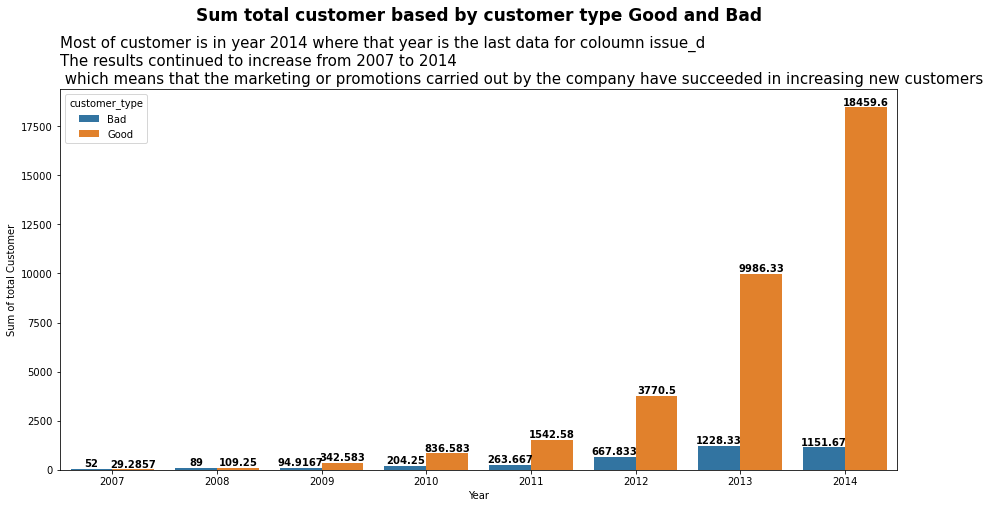

In [16]:
fig,ax= plt.subplots(figsize=(15,7))
sns.barplot(x='year', y='total_cus', data=df_ins1, hue='customer_type',ci = 0);

for label in ax.containers:
    ax.bar_label(label,fontweight='bold')
    
plt.title('Sum total customer based by customer type Good and Bad\n\n\n', fontsize=17, fontweight='bold')
plt.title('Most of customer is in year 2014 where that year is the last data for coloumn issue_d \n' 
          'The results continued to increase from 2007 to 2014 \n '
          'which means that the marketing or promotions carried out by the company have succeeded in increasing new customers',
          fontsize =15, loc='left')

plt.xlabel('Year')
plt.xticks(np.arange(8), ['2007','2008','2009','2010','2011','2012','2013','2014'])

plt.ylabel('Sum of total Customer')
plt.show()

Plot diatas menunjukkan bagaimana perkembangan customer baru yang membuka akun pada perushaan, yang dapat dilihat bahwa pada setiap tahun jumlah dari customer terus bertambah dari tahun 2014 hingga tahun 2017 yang menunjukkan Pemasaran atau pemromosian pembukaan kredit perusahaan berhasil dalam menarik kutomer baru

## 2.  Hubungan Purpose dengan Persentase Customer Bad

In [17]:
# jumlah Good Customer berdasarkan purpose 
df_ins2_1 = df_ins[(df_ins['customer_type'] == 'Good')]
df_ins2_1_ms = df_ins2_1.groupby(['purpose'])['member_id'].agg(['count']).reset_index()
df_ins2_1_ms.columns = ['Alasan', 'Good_customer'] 
df_ins2_1_ms

,Alasan,Good_customer
0,Life_spending,16882
1,Object_spending,31022
2,credit_card,96403
3,debt_consolidation,247127
4,major_purchase,8880
5,other,20460


In [18]:
# jumlah Bad Customer berdasarkan purpose 
df_ins2_2 = df_ins[(df_ins['customer_type'] == 'Bad')]
df_ins2_2_ms = df_ins2_2.groupby(['purpose'])['member_id'].agg(['count']).reset_index()
df_ins2_2_ms.columns = ['Alasan', 'Bad_customer'] 
df_ins2_2_ms

,Alasan,Bad_customer
0,Life_spending,3241
1,Object_spending,3091
2,credit_card,7685
3,debt_consolidation,26728
4,major_purchase,912
5,other,3103


In [19]:
df_joker = pd.merge(df_ins2_1_ms, df_ins2_2_ms, on='Alasan', how='outer')
df_joker = df_joker.fillna(0)
df_joker['Total_Customer'] = df_joker['Good_customer']+df_joker['Bad_customer']
df_joker['Bad_Cus_persentage'] = round(100.00*(df_joker['Bad_customer']/df_joker['Total_Customer']),2)
df_joker.sort_values(['Bad_Cus_persentage'])

,Alasan,Good_customer,Bad_customer,Total_Customer,Bad_Cus_persentage
2,credit_card,96403,7685,104088,7.38
1,Object_spending,31022,3091,34113,9.06
4,major_purchase,8880,912,9792,9.31
3,debt_consolidation,247127,26728,273855,9.76
5,other,20460,3103,23563,13.17
0,Life_spending,16882,3241,20123,16.11


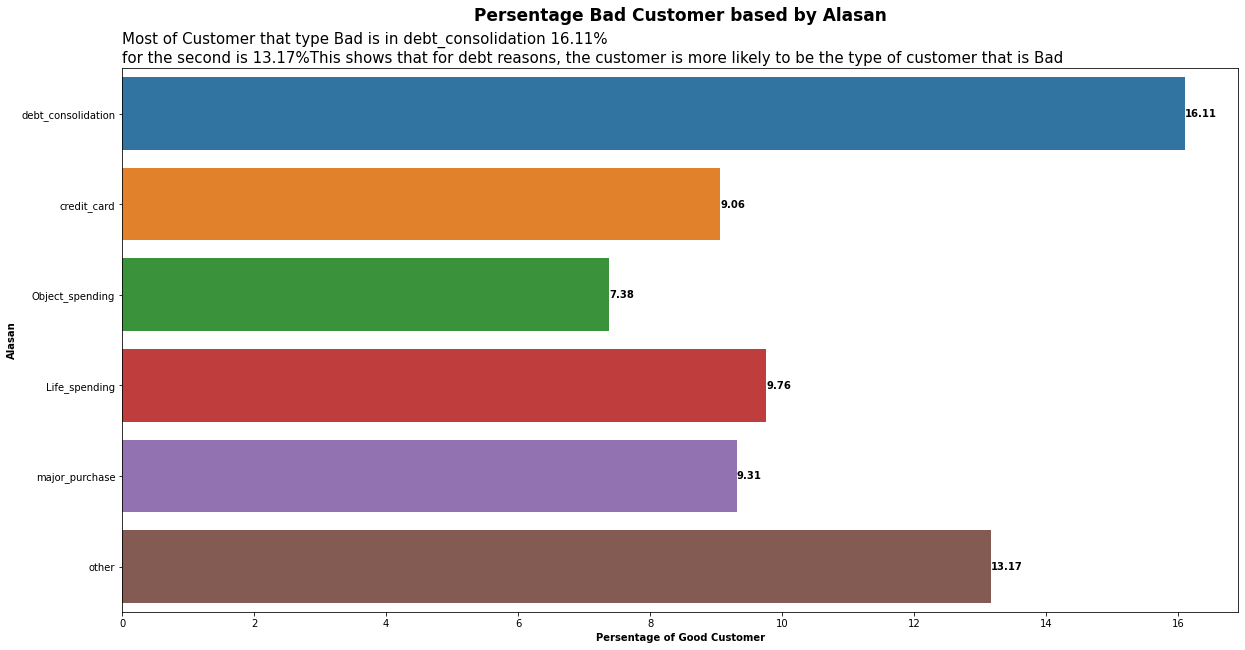

In [20]:
fig,ax= plt.subplots(figsize=(20,10))
sns.barplot(x='Bad_Cus_persentage', y='Alasan', data=df_joker, palette ="tab10");

for label in ax.containers:
    ax.bar_label(label,fontweight='bold')
    
plt.title('Persentage Bad Customer based by Alasan\n\n', fontsize=17, fontweight='bold')
plt.title('Most of Customer that type Bad is in debt_consolidation 16.11% \n' 
          'for the second is 13.17%This shows that for debt reasons, the customer is more likely to be the type of customer that is Bad ', 
          fontsize =15, loc='left')

plt.ylabel('Alasan',fontweight='bold')
plt.yticks(np.arange(6), ['debt_consolidation','credit_card','Object_spending','Life_spending','major_purchase','other'])

plt.xlabel('Persentage of Good Customer',fontweight='bold')
plt.show()

Persentase yang ditunjukkan merupakan persentase Customer yang buruk, dari plot tersebut diperlihatkan paling besar persentase kustomer buruk(Bad) yaitu pada alasan hutang(dept_consolidation) sebesar 16.11%

## 3. Pengaruh grade dan home ownership dengan jumlah customer

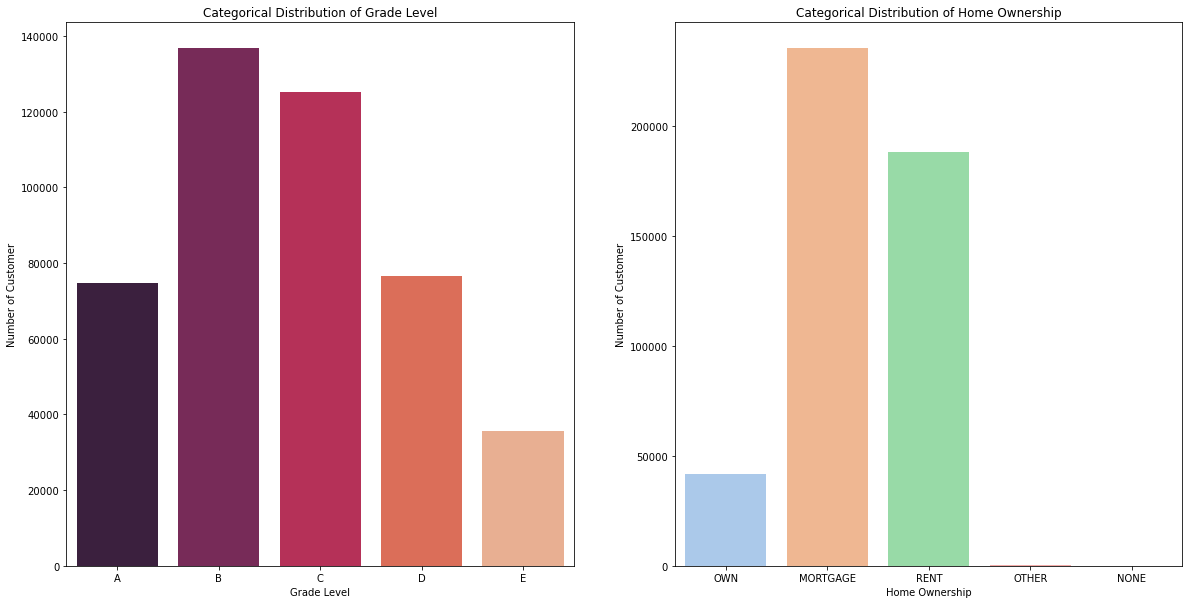

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(ax=axes[0], x=df_ins['grade'].value_counts().index, y=df_ins['grade'].value_counts().values, palette='rocket', order=['A', 'B', 'C', 'D', 'E'])
axes[0].set_title('Categorical Distribution of Grade Level')
axes[0].set_xlabel('Grade Level')
axes[0].set_ylabel('Number of Customer')

sns.barplot(ax=axes[1], x=df_ins['home_ownership'].value_counts().index, y=df_ins['home_ownership'].value_counts().values, palette='pastel', order=['OWN', 'MORTGAGE', 'RENT', 'OTHER', 'NONE'])
axes[1].set_title('Categorical Distribution of Home Ownership')
axes[1].set_xlabel('Home Ownership')
axes[1].set_ylabel('Number of Customer')

plt.show()

Kedua plot diatas menunjukkan bagaimana pengaruh kolom grade dan jome ownership terhadap jumlah customer yang ada, dan dapat dilihat bahwa pada grade banyak customer pada grade B dan C dan untuk Home ownership banyak pada MORTGAGE dan RENT yang menunjukkan tingkatan dari kustomer dan kebutuhan kredit berdasarkan jenis tempat tinggal yang digunakan

# Preprocessing machine learning

In [22]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465534 entries, 0 to 466284
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   member_id                465534 non-null  int64  
 1   loan_amnt                465534 non-null  int64  
 2   funded_amnt              465534 non-null  int64  
 3   funded_amnt_inv          465534 non-null  float64
 4   int_rate                 465534 non-null  float64
 5   installment              465534 non-null  float64
 6   grade                    465534 non-null  object 
 7   home_ownership           465534 non-null  object 
 8   annual_inc               465534 non-null  float64
 9   loan_status              465534 non-null  object 
 10  purpose                  465534 non-null  object 
 11  dti                      465534 non-null  float64
 12  open_acc                 465534 non-null  float64
 13  revol_bal                465534 non-null  int64  
 14  revo

In [23]:
df_ins.describe().T

,count,mean,std,min,25%,50%,75%,max
member_id,465534.0,1.460204e+07,1.168118e+07,70694.00,4.381215e+06,1.194197e+07,2.300191e+07,4.086083e+07
loan_amnt,465534.0,1.432216e+04,8.284456e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,465534.0,1.429665e+04,8.272301e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,465534.0,1.422792e+04,8.295385e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,465534.0,1.382651e+01,4.356828e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,465534.0,4.321900e+02,2.434155e+02,15.67,2.568800e+02,3.802200e+02,5.667275e+02,1.409990e+03
annual_inc,465534.0,7.327830e+04,5.495372e+04,1896.00,4.500000e+04,6.300000e+04,8.896825e+04,7.500000e+06
dti,465534.0,1.722335e+01,7.849373e+00,0.00,1.137000e+01,1.687000e+01,2.279000e+01,3.999000e+01
open_acc,465534.0,1.119310e+01,4.985070e+00,1.00,8.000000e+00,1.000000e+01,1.400000e+01,8.400000e+01
revol_bal,465534.0,1.623851e+04,2.066486e+04,0.00,6.424000e+03,1.177400e+04,2.034300e+04,2.568995e+06


### Feature Selection
Terdapat beberapa kolom atau feature yang akan didrop dikarenakan :
1. Nilai unik terlalu banyak (member_id)
2. kolom-kolom dengan nilai yang mirip (month_issue_d,funded_amnt,funded_amnt_inv,out_prncp_inv,total_pymnt_inv) <br>
Setelah dianalisis kembali ternayata terdapat kolom-kolom dengan nilai yang mirip, ini akan membuat overfitting karena featute yang dimiliki terlalu banyak, jadi kita drop kolom dengan nilai yang mirip disisakan satu diantaranya 

In [24]:
df_ml = df_ins.copy()
df_ml = df_ml.drop(['member_id','loan_status','month_issue_d','funded_amnt','funded_amnt_inv','out_prncp_inv','total_pymnt_inv'],axis=1)

In [25]:
# mengubah nilai target
df_ml['customer_type'] = np.where(df_ml['customer_type'] == 'Good', 1, 0).astype(np.int64)
df_ml = df_ml.drop(df_ml[df_ml['last_pull_payment_d'] < 0].index)

In [26]:
# memeriksa nilai duplikat
df_ml.duplicated().sum()

0

<AxesSubplot:>

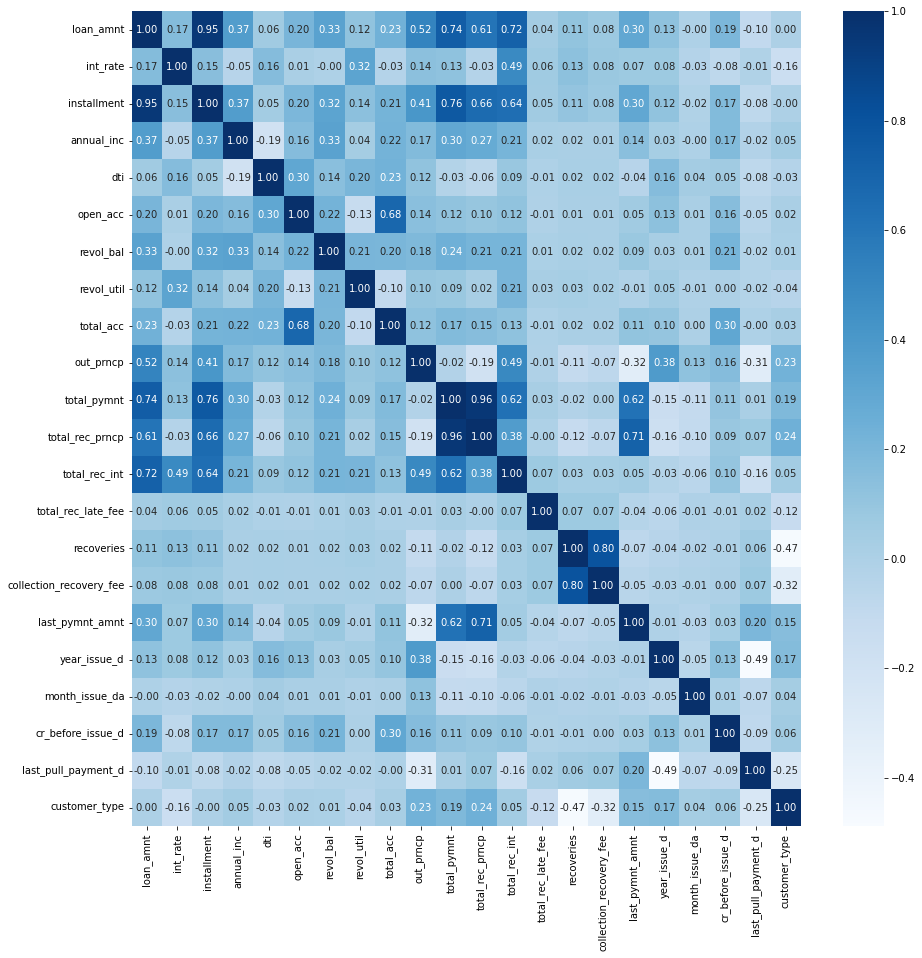

In [27]:
# correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df_ml.corr(), cmap='Blues', annot=True, fmt='.2f')

Untuk korelasi dengan nilai terlau rendah atau terlalu tinggi satu dengan yang lain akan dihapus salah satunya, yaitu:
* installment,total_rec_prncp, month_issue_da, total_acc, open_acc, revol_bal, dti 	

In [28]:
# dihapus berdasarkan hasil korelasi
df_ml = df_ml.drop(['installment','total_rec_prncp', 'month_issue_da', 'total_acc', 'open_acc', 'revol_bal', 'dti' ],axis=1)

In [29]:
df_cor = df_ml.copy()

In [30]:
# extracted Feature and target berdasarkan numerik dan kategori 
num = ['loan_amnt','int_rate','annual_inc','revol_util','out_prncp','total_pymnt','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','year_issue_d','cr_before_issue_d','last_pull_payment_d']
cat = ['grade','home_ownership','purpose']
tar = ['customer_type']
use = num+cat+tar
df_use = df_ml[use]

In [31]:
# menghapus data Outlier
from scipy import stats 

df_outliers = df_use.copy()
nums = num

print(f'Jumlah baris sebelum memfilter outlier: {len(df_outliers)}')

filtered_entries = np.array([True] * len(df_outliers))

for col in nums:
    zscore = abs(stats.zscore(df_outliers[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_outliers = df_outliers[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_outliers)}') #cek yang dihapus data seperti apa, hubungan antar fitur, masuk akal gak

Jumlah baris sebelum memfilter outlier: 456626
Jumlah baris setelah memfilter outlier: 390001


Dilakukan proses preprocessing data untuk mengurangi feature berdasarkan hasil nilai distribusinya, nilai correlasi, duplikasi dan juga outlier yang ada 

# Feature Encoding

In [32]:
# menunjukkan nilai unik kolom kategorical yang akan di encode
df_enc = df_outliers.copy()
for col in cat:
  print(f'value counts of column {col}')
  print(df_enc[col].value_counts())
  print('---'*10, '\n')

value counts of column grade
B    121423
C    106825
A     65981
D     61565
E     24720
F      7859
G      1628
Name: grade, dtype: int64
------------------------------ 

value counts of column home_ownership
MORTGAGE    192171
RENT        162645
OWN          35120
OTHER           35
NONE            30
Name: home_ownership, dtype: int64
------------------------------ 

value counts of column purpose
debt_consolidation    229312
credit_card            90209
Object_spending        27555
other                  19440
Life_spending          15436
major_purchase          8049
Name: purpose, dtype: int64
------------------------------ 



In [33]:
# label encoder
# grade
mapping_grade = {
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3,
    'E' : 4,
    'F' : 5,
    'G' : 6
}

df_enc['grade_mapped'] = df_enc['grade'].map(mapping_grade)

# home_ownership
mapping_home_ownership = {
    'OWN' : 0,
    'MORTGAGE' : 1,
    'RENT' : 2,
    'OTHER' : 3,
    'NONE' : 4
}

df_enc['home_ownership_mapped'] = df_enc['home_ownership'].map(mapping_home_ownership)

df_enc = df_enc.drop(['grade', 'home_ownership'],axis=1)

In [34]:
# onehot encoder
# Feature encode tipe kategorical,
df_onehot = df_enc.copy()
for cat in ['purpose']:
    onehots = pd.get_dummies(df_onehot[cat], prefix=cat)
    df_onehot = df_onehot.join(onehots)
    df_onehot = df_onehot.drop(['purpose'],axis=1)
df_onehot.sample(10)

,loan_amnt,int_rate,annual_inc,revol_util,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,...,last_pull_payment_d,customer_type,grade_mapped,home_ownership_mapped,purpose_Life_spending,purpose_Object_spending,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other
173373,12000,14.33,73288.0,74.2,0.00,14411.960000,2826.16,0.0,0.0,0.0,...,0,1,2,2,0,0,0,1,0,0
122422,8325,10.64,25000.0,69.9,1579.69,8130.910000,1385.60,0.0,0.0,0.0,...,0,1,1,2,0,0,1,0,0,0
179672,24000,6.62,135000.0,57.4,0.00,26527.940000,2527.95,0.0,0.0,0.0,...,1,1,0,1,0,0,0,1,0,0
184672,5000,7.90,37000.0,27.7,0.00,5632.206655,632.21,0.0,0.0,0.0,...,0,1,0,2,0,0,0,1,0,0
334213,4800,16.99,75000.0,57.0,0.00,5226.660000,426.66,0.0,0.0,0.0,...,4,1,3,1,0,0,0,1,0,0
149985,12000,8.90,225000.0,54.4,1126.31,12574.320000,1700.63,0.0,0.0,0.0,...,0,1,0,1,0,0,0,1,0,0
343600,25000,6.49,65000.0,42.2,13106.16,13790.160000,1896.32,0.0,0.0,0.0,...,0,1,0,1,0,0,0,1,0,0
195540,11500,15.31,34500.0,54.7,0.00,14414.174320,2914.17,0.0,0.0,0.0,...,3,1,2,2,0,0,0,1,0,0
224152,8000,6.62,42000.0,31.1,0.00,8663.210000,663.21,0.0,0.0,0.0,...,16,1,0,2,0,0,0,1,0,0
54847,15000,10.99,80000.0,51.7,5118.51,12271.390000,2389.90,0.0,0.0,0.0,...,0,1,1,1,0,0,0,1,0,0


In [35]:
df_onehot.sample(5).T

,94075,181183,334266,212422,189095
loan_amnt,16800.00,20000.00000,26000.00,20500.00,16000.00000
int_rate,12.35,13.11000,15.61,19.22,17.77000
annual_inc,55000.00,90000.00000,62478.00,65000.00,80000.00000
revol_util,95.90,91.80000,71.30,60.50,83.70000
out_prncp,4288.92,0.00000,20546.88,0.00,0.00000
total_pymnt,15698.01,25485.48507,10657.30,22612.20,20757.31429
total_rec_int,3186.93,5485.49000,5204.18,6387.75,4757.31000
total_rec_late_fee,0.00,0.00000,0.00,0.00,0.00000
recoveries,0.00,0.00000,0.00,10.00,0.00000
collection_recovery_fee,0.00,0.00000,0.00,0.00,0.00000


Dilakukan Encode Featire yang telah terpilih, untuk kategorik dilakukan feature encode label untuk feature grade dan home ownership yang dapat diurutkan niainya (ordinal) dan onehot untuk kategorik purpose yang nominal

### Distribusi Customer Good and Bad

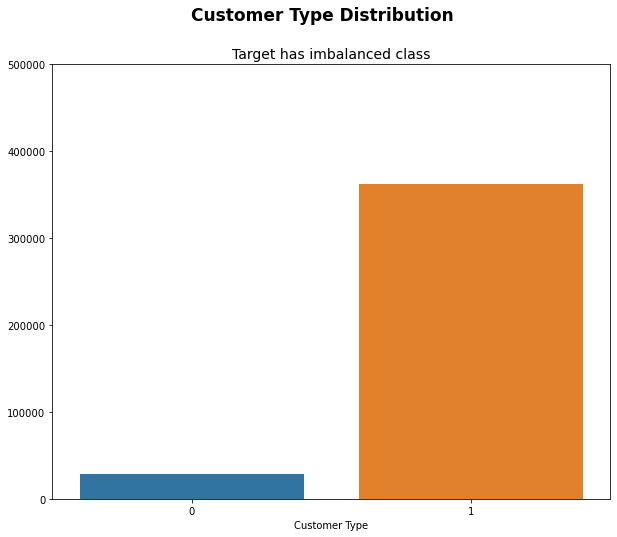

In [36]:
counts = df_onehot['customer_type'].value_counts()

plt.figure(figsize=(10,8))

ax = sns.barplot(x=counts.index,y=counts)
ax.set(xlabel='Customer Type')
ax.set(ylabel=None)

plt.suptitle('Customer Type Distribution', fontsize=17, fontweight='bold')
plt.title('Target has imbalanced class', fontsize=14)
plt.ylim(0,500000)
plt.show()

Setelah dilakukan pengecekan nilai data berdasarkan target diketahui bahwa data yang dimiliki imbalance dan akan dilakukan proses Handling Imbalance data 

# Split Data dan Imbalance Data 

In [37]:
df_split = df_onehot.copy()

# Split Feature and Target
x = df_split.drop(['customer_type'],axis=1)
y = df_split['customer_type'] # target 

In [38]:
# import library, digunakan beberapa algoritma 
from imblearn.over_sampling import SMOTE

from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(x, y)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(x, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(x, y)

In [39]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
1    361650
0     28351
Name: customer_type, dtype: int64


UNDERSAMPLING
1    56702
0    28351
Name: customer_type, dtype: int64


OVERSAMPLING
1    361650
0    180825
Name: customer_type, dtype: int64


SMOTE
1    361650
0    180825
Name: customer_type, dtype: int64


Menggunakan beberapa algoritma untuk handling imbalance data akan dipilih hasil yang diasumsikan paling baik, dari hasil diatas didapat hasil data yang masih banyak dan mendekati yaitu pada Oversampling atau SMOTE, pada projek ini akan digunakan metode SMOTE

In [40]:
#Splitting the data into Train and Test
xtrain, xtest, ytrain, ytest = train_test_split(X_over_SMOTE, y_over_SMOTE, test_size = 0.3, random_state = 42)

In [41]:
result = experiment(xtrain,xtest,ytrain,ytest)
result = pd.DataFrame(result)

In [42]:
result

,model_name,model,accuracy,recall,precision,duration
0,K-Nearest Neighbor,KNeighborsClassifier(),0.992983,0.994957,0.994517,0.058394
1,Logistic Regression,LogisticRegression(),0.992848,0.997797,0.991526,2.580042
2,Decision Tree,DecisionTreeClassifier(),0.994402,0.995640,0.995961,2.834606
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.997450,0.999834,0.996353,40.065719
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.992479,0.996893,0.991864,94.252389


Split data yang dilakukan yaitu Test data 30:70 Training data, dan hasil modeling yang didapat dengan menggunakan beberapa algoritma, hasil model paling baik akan menggunakan nilai precission terbaik yaitu Decision tree dengan nilai preccision paling tinggi dengan nilai 0.996734 atau 99.67% 

# Evaluation

## Confusion Matrix

In [43]:
final_model = result['model'][2]
ypred = final_model.predict(xtest)

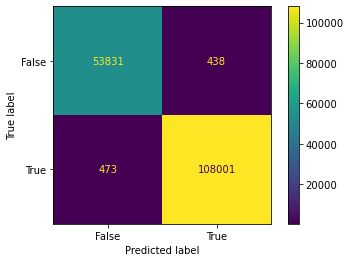

In [44]:
cm = confusion_matrix(ytest,ypred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = [False, True])

disp.plot()
plt.show()

Untuk menentukan model terbaik ditentukan dengan nilai precission karena lebih tepat untuk problem penentuan customer yang baik atau buruk, Algoritma model terbaik yaitu Decission Tree dengan perhitungan precission yaitu :

* Precission = True Positif / (True Positif + False Positif) = 108043 /(108043+431) = 99.6%

## Feature Importance

In [45]:
feature_imp = {}

feature_imp['columns'] = xtrain.columns
feature_imp['feature_imp'] = result['model'][2].feature_importances_

In [46]:
df_feature_imp = pd.DataFrame(feature_imp)
df_feature_imp = df_feature_imp.sort_values(['feature_imp'],ascending=False).head(20)

<AxesSubplot:xlabel='feature_imp', ylabel='columns'>

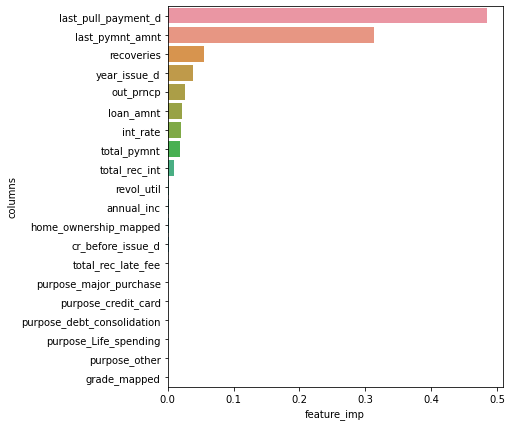

In [47]:
plt.figure(figsize=(6,7))
sns.barplot(x=df_feature_imp['feature_imp'],y=df_feature_imp['columns'])

feature importance yang didapatkan dari model dengan algoritma Decision Tree, 7 feature tertinggi yaitu :
1. last_pull_payment_d = jumlah bulan terakhir bayar dengan terakhir menggunakan kredit
2. last_pymnt_amnt = Jumlah bulan terakhir membayar
3. Jumlah yang dibutuhkan untuk memulihkan akun
4. year_issue_d = tahun dibuatnya akun
5. Out_pmcp = Sisa pokok pinjaman untuk jumlah total yang didanai
6. loan_amnt = Pembayaran bulan lalu telah diterima
7. total_pymnt = Pembayaran diterima hingga saat ini untuk jumlah total yang didanai

## ROC Plot

In [48]:
#define metrics
final_model = result['model'][2]
y_pred_proba = final_model.predict_proba(xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

NameError: name 'metrics' is not defined

Hasil dari plot sangat tajam yang ini di sebabkan nilai AUC yang tinggi, nilai ini kemungkinan disebabkan oleh feature data yang overfiting dan membuat persentasi tinggi yang berarti model ini perlu dikembangkan lagi dengan perubahan-perubahan baru lagi 

### Referensi

* Rakamin & ID/X Partnership
* https://www.statology.org/plot-multiple-roc-curves-python/

Terima kasih